## 1. Acces to IPM Source from OpenAlea python
Access to notebook https://github.com/H2020-IPM-openalea/weatherdata/blob/refactoring/example/Weather_demonstration.ipynb

In [1]:
import pandas
pandas.set_option('display.max_rows',10)
import logging, sys
from weatherdata import WeatherDataHub



## 1.1 Access to IPM Catalog and IPM list of weather parameters 

In [2]:
ws= WeatherDataHub()
ws.list_resources

,name,description,parameters
0,Met Norway Locationforecast,9-day forecasts for the entire planet. 2.5 km ...,"{'common': [1001, 3001, 2001, 4002], 'optional..."
1,Met Éireann Locationforecast,9-day forecasts for Ireland.,"{'common': [1001, 3001, 2001, 4002], 'optional..."
2,DMI Pointweather service,Seasonal weather data and forecasts for Denmar...,"{'common': [1002, 1112, 2001, 3002, 3101, 4002..."
3,SLU Lantmet service,Seasonal weather data and forecasts for Sweden...,"{'common': [1002, 1003, 1004, 2001, 3002, 3003..."
4,Deutsche Wetterdienst location forecast by IPM...,27 hour weather forecasts for Germany and surr...,"{'common': [1001, 3001, 2001, 4002], 'optional..."
...,...,...,...
10,Landbruksmeteorologisk tjeneste,Weather station network covering major agricul...,"{'common': [1002, 1003, 1004, 3002, 2001, 4003..."
11,MeteoBot API,Network of privately owned weather stations. A...,"{'common': [1001, 3001, 2001, 4002], 'optional..."
12,Fruitweb,Network of privately owned weather stations of...,"{'common': [1001, 3001, 2001, 4002], 'optional..."
13,Metos,Network of privately owned weather stations of...,"{'common': [1001, 3001, 2001, 4002], 'optional..."


In [3]:
ws.parameters

,id,name,description,unit,aggregationType
0,1001,Instantaneous temperature at 2m,None,Celcius,AVG
1,1002,Mean air temperature at 2m,None,Celcius,AVG
2,1003,Minimum air temperature at 2m,None,Celcius,MIN
3,1004,Maximum air temperature at 2m,None,Celcius,MAX
4,1021,Instantaneous temperature in canopy,None,Celcius,AVG
...,...,...,...,...,...
38,4012,Instantaneous wind speed at 10m,None,m/s,AVG
39,4013,Mean wind speed at 10m,None,m/s,AVG
40,4014,Max wind speed at 10m,None,m/s,MAX
41,4015,Min wind speed at 10m,None,m/s,MIN


## 1.2 Get a ressource, access to meta-information of this ressource 

### 1.2.1 get ressouce

In [4]:
fmi = ws.get_ressource(name="Finnish Meteorological Institute measured data")

### 1.2.2 Meta-informations of the ressource

### 1.2.2.1  List of parameters

In [5]:
fmi.parameter

,id,name,description,unit,aggregationType
1,1002,Mean air temperature at 2m,None,Celcius,AVG
20,2001,Precipitation,None,mm,SUM
22,3002,Mean RH at 2m,None,%,AVG
34,4003,Mean wind speed at 2m,None,m/s,AVG


### 1.2.2.2 list of stations 

In [6]:
fmi.stations

,name,id,latitude,longitude
0,Alajärvi Möksy,101533,24.26,63.09
1,Asikkala Pulkkilanharju,101185,25.52,61.27
2,Enontekiö Kilpisjärvi Saana,102017,20.85,69.04
3,Enontekiö Kilpisjärvi,102016,20.79,69.05
4,Enontekiö Näkkälä,102019,23.58,68.60
...,...,...,...,...
203,Virolahti Koivuniemi,101231,27.67,60.53
204,Virrat Äijänneva,101310,23.54,62.33
205,Ylitornio Meltosjärvi,101908,24.65,66.53
206,Ylivieska airfield,101690,24.72,64.05


### 1.2 Get data and visualized
* get data according to weather parameters or several localisation

In [7]:
logging.disable(sys.maxsize)
exclude=[137188,101649,855522,137189,126737]
list_station=[int(id) for id in fmi.stations.id if not int(id) in exclude]


In [8]:
ds=fmi.data(parameters=[1002,3002],
            stationId=list_station,
            timeZone="Europe/Oslo",savecache=True,usecache=True)
ds

<xarray.Dataset>
Dimensions:   (location: 203, time: 505)
Coordinates:
  * location  (location) int64 100683 100907 100908 ... 806428 852678 874863
  * time      (time) datetime64[ns] 2020-06-12 ... 2020-07-03
    lat       (location) float64 60.3 60.13 59.78 59.96 ... 66.17 60.29 60.18
    lon       (location) float64 25.55 19.9 21.37 19.95 ... 29.14 24.57 24.79
Data variables:
    1002      (time, location) float64 15.3 9.4 13.6 12.8 ... 0.1 6.8 12.5 13.8
    3002      (time, location) float64 74.0 84.0 92.0 84.0 ... 85.0 99.0 96.0
Attributes:
    weatherRessource:  Finnish Meteorological Institute measured data
    timeStart:         2020-06-12T00:00:00.000000000
    timeEnd:           2020-07-03T00:00:00.000000000
    parameters:        ['1002', '3002']

* Visualization

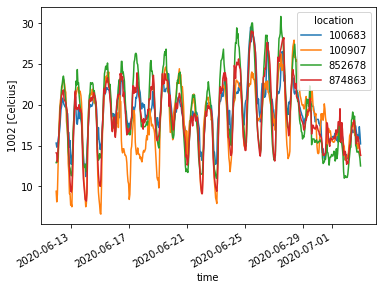

In [9]:
fmi.plot(ds,varname='1002',location=[100683,100907,852678,874863],resample=None)

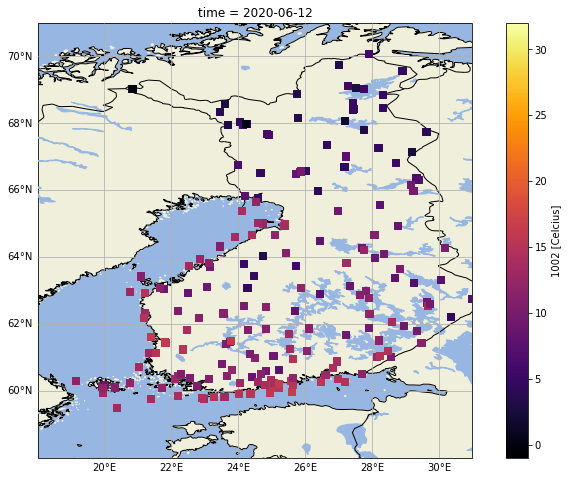

In [10]:
fmi.station_plot(ds=ds, varname="1002",time=0,resample=None)

## 2. Add local OpenAlea ressouce to local IPM catalog

* import local data

In [11]:
data=ws.__data_reader__(r'C:\Users\mlabadie\Documents\GitHub\weatherdata\example\Boigneville_2012_2013_h.csv')
data

,temperature_air,relative_humidity,rain,wind_speed,global_radiation
2012-09-01 00:00:00,8.6,74.5,0.0,1.666667,0.0
2012-09-01 01:00:00,7.5,76.5,0.0,1.666667,0.0
2012-09-01 02:00:00,7.5,78.0,0.0,1.388889,0.0
2012-09-01 03:00:00,7.0,80.0,0.0,1.111111,0.0
2012-09-01 04:00:00,6.7,81.0,0.0,1.388889,0.0
...,...,...,...,...,...
2013-08-31 19:00:00,18.3,74.5,0.0,0.833333,0.0
2013-08-31 20:00:00,17.8,78.5,0.0,1.666667,0.0
2013-08-31 21:00:00,17.9,78.0,0.0,2.222222,0.0
2013-08-31 22:00:00,17.0,77.0,0.0,2.777778,0.0


* Add the local_ressources

In [12]:
ws.add_local_ressource(name="Mydata",
                       data=data,
                       latitude=14.03,
                       longitude=55.3,
                       altitude=0,
                       convert_name={"temperature_air":1001,
                                     "relative_humidity":3001,
                                     "rain":2001,
                                     "wind_speed":4005,
                                     "global_radiation":5001})

,1001,3001,2001,4005,5001
2012-09-01 00:00:00,8.6,74.5,0.0,1.666667,0.0
2012-09-01 01:00:00,7.5,76.5,0.0,1.666667,0.0
2012-09-01 02:00:00,7.5,78.0,0.0,1.388889,0.0
2012-09-01 03:00:00,7.0,80.0,0.0,1.111111,0.0
2012-09-01 04:00:00,6.7,81.0,0.0,1.388889,0.0
...,...,...,...,...,...
2013-08-31 19:00:00,18.3,74.5,0.0,0.833333,0.0
2013-08-31 20:00:00,17.8,78.5,0.0,1.666667,0.0
2013-08-31 21:00:00,17.9,78.0,0.0,2.222222,0.0
2013-08-31 22:00:00,17.0,77.0,0.0,2.777778,0.0


The ressources has been added at the local catalog to be used like any other ressources of the catalog

In [13]:
ws.list_resources

,name,description,parameters
0,Met Norway Locationforecast,9-day forecasts for the entire planet. 2.5 km ...,"{'common': [1001, 3001, 2001, 4002], 'optional..."
1,Met Éireann Locationforecast,9-day forecasts for Ireland.,"{'common': [1001, 3001, 2001, 4002], 'optional..."
2,DMI Pointweather service,Seasonal weather data and forecasts for Denmar...,"{'common': [1002, 1112, 2001, 3002, 3101, 4002..."
3,SLU Lantmet service,Seasonal weather data and forecasts for Sweden...,"{'common': [1002, 1003, 1004, 2001, 3002, 3003..."
4,Deutsche Wetterdienst location forecast by IPM...,27 hour weather forecasts for Germany and surr...,"{'common': [1001, 3001, 2001, 4002], 'optional..."
...,...,...,...
11,MeteoBot API,Network of privately owned weather stations. A...,"{'common': [1001, 3001, 2001, 4002], 'optional..."
12,Fruitweb,Network of privately owned weather stations of...,"{'common': [1001, 3001, 2001, 4002], 'optional..."
13,Metos,Network of privately owned weather stations of...,"{'common': [1001, 3001, 2001, 4002], 'optional..."
14,Meteodata by Météo Concept,Weather station network covering all of mainla...,"{'common': [1001, 2001, 3001, 4001, 4003], 'op..."


In [14]:
personal_data=ws.get_ressource(name="Mydata")
ds=personal_data.to_ipm(display="ds")
ds

<xarray.Dataset>
Dimensions:   (time: 8760, location: 1)
Coordinates:
  * time      (time) datetime64[ns] 2012-08-31T22:00:00 ... 2013-08-31T21:00:00
  * location  (location) <U13 '[14.03, 55.3]'
    lat       (location) float64 14.03
    lon       (location) float64 55.3
Data variables:
    1001      (time, location) float64 8.6 7.5 7.5 7.0 ... 17.8 17.9 17.0 15.9
    3001      (time, location) float64 74.5 76.5 78.0 80.0 ... 78.0 77.0 75.0
    2001      (time, location) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    4005      (time, location) float64 1.667 1.667 1.389 ... 2.222 2.778 3.611
    5001      (time, location) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    weatherRessource:  Mydata
    timeStart:         2012-08-31T22:00:00.000000000
    timeEnd:           2013-08-31T21:00:00.000000000
    parameters:        ['1001', '3001', '2001', '4005', '5001']

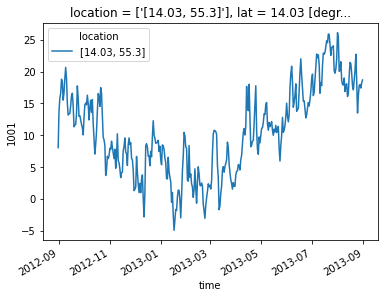

In [15]:
personal_data.plot(ds,varname="1001",resample="d")